In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
import seaborn as sns

In [35]:
df = pd.read_csv("Iris.csv")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [37]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
# Printing categorical and continous columns

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)

Categorical Columns: ['Species']
Continuous Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


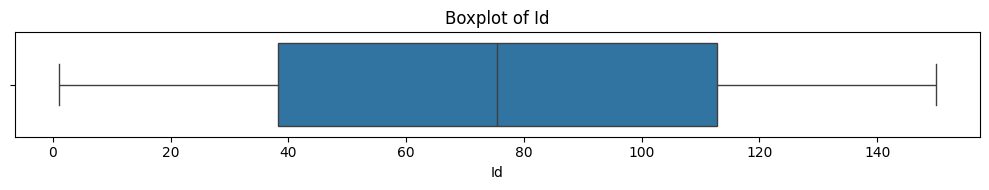

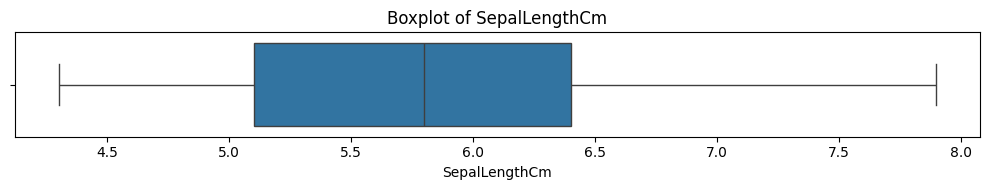

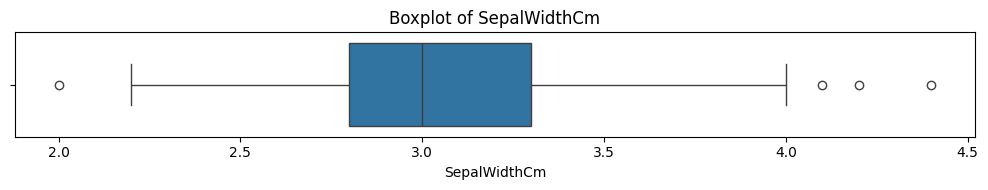

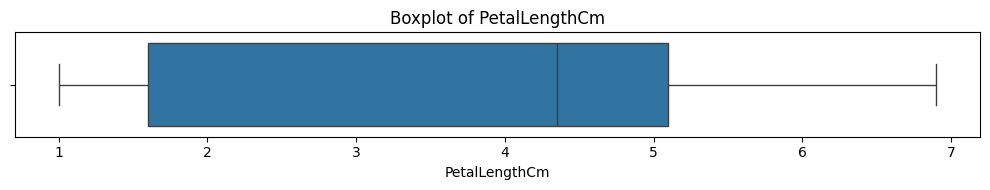

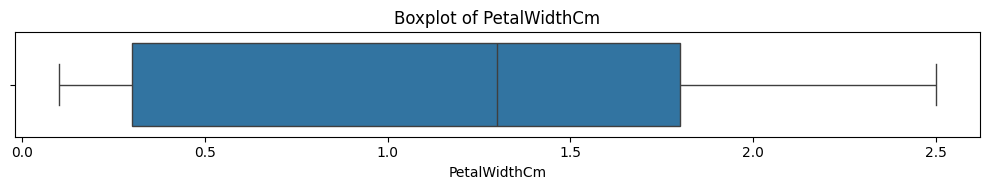

In [39]:
# Creating Boxplot for the continous columns in the dataset

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Unnamed: 32': # Exclude the column with all NaN values
        plt.figure(figsize=(10, 2)) # Adjust figure size as needed
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

In [40]:
#Outliers removal using Z score
from scipy import stats
X = df.select_dtypes(include=['float64', 'int64'])
y = df['Species']
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X_filtered = X[filtered_entries]
y_filtered = y[filtered_entries]
print(f"Original number of samples: {len(X)}")
print(f"Number of samples after outlier removal: {len(X_filtered)}")

Original number of samples: 150
Number of samples after outlier removal: 149


In [41]:
# Features and label (using filtered data)
X = X_filtered
y = y_filtered

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_scaled: (104, 5)
Shape of X_test_scaled: (45, 5)
Shape of y_train: (104,)
Shape of y_test: (45,)


In [42]:
# Try different values of K
k_range = range(1, 11)
accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)
    print(f'K={k} | Accuracy: {acc:.2f}')


K=1 | Accuracy: 1.00
K=2 | Accuracy: 1.00
K=3 | Accuracy: 1.00
K=4 | Accuracy: 1.00
K=5 | Accuracy: 1.00
K=6 | Accuracy: 1.00
K=7 | Accuracy: 1.00
K=8 | Accuracy: 1.00
K=9 | Accuracy: 1.00
K=10 | Accuracy: 1.00


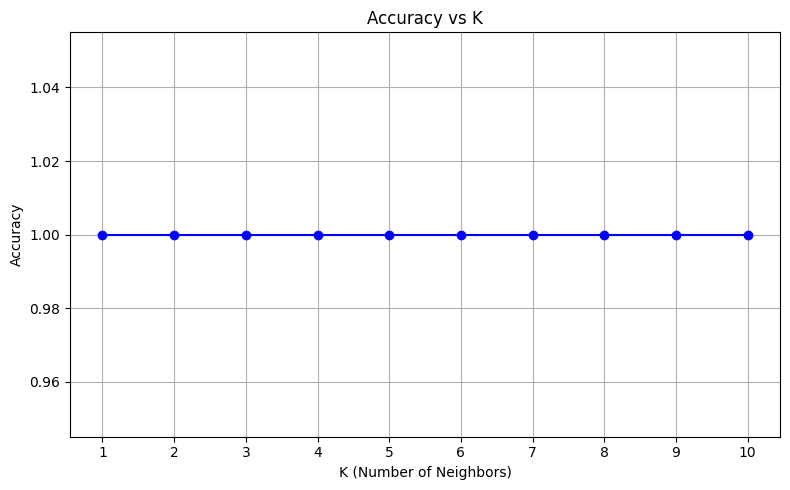

In [49]:
# Plot accuracy vs K
if accuracies:
    plt.figure(figsize=(8, 5))
    plt.plot(list(k_range), accuracies, marker='o', color='blue', linestyle='-')
    plt.title('Accuracy vs K')
    plt.xlabel('K (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.xticks(list(k_range))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No accuracies to plot — please check the loop.")


Best K = 1


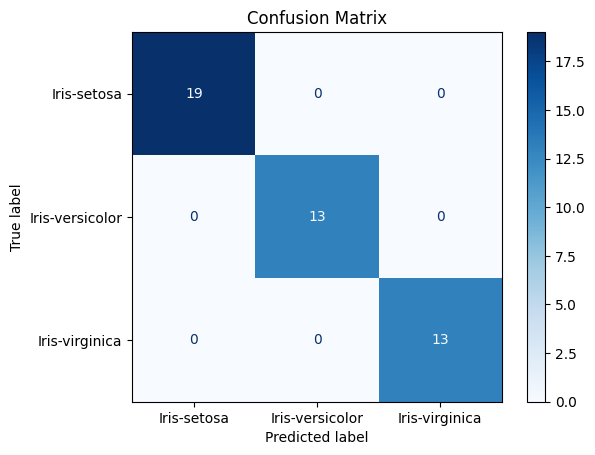

In [43]:
# 4. Evaluate best model
best_k = k_range[np.argmax(accuracies)]
print(f'\nBest K = {best_k}')
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [44]:
from sklearn.preprocessing import LabelEncoder
features = ['PetalLengthCm', 'PetalWidthCm']
X_vis = X_filtered[features].values
y_vis = y_filtered

# Encode target variable
label_encoder = LabelEncoder()
y_vis_encoded = label_encoder.fit_transform(y_vis)

X_vis_scaled = scaler.fit_transform(X_vis)

X_train_vis, X_test_vis, y_train_vis_encoded, y_test_vis_encoded = train_test_split(X_vis_scaled, y_vis_encoded, test_size=0.3, random_state=42)

model_vis = KNeighborsClassifier(n_neighbors=best_k)
model_vis.fit(X_train_vis, y_train_vis_encoded)

KNeighborsClassifier(n_neighbors=1)

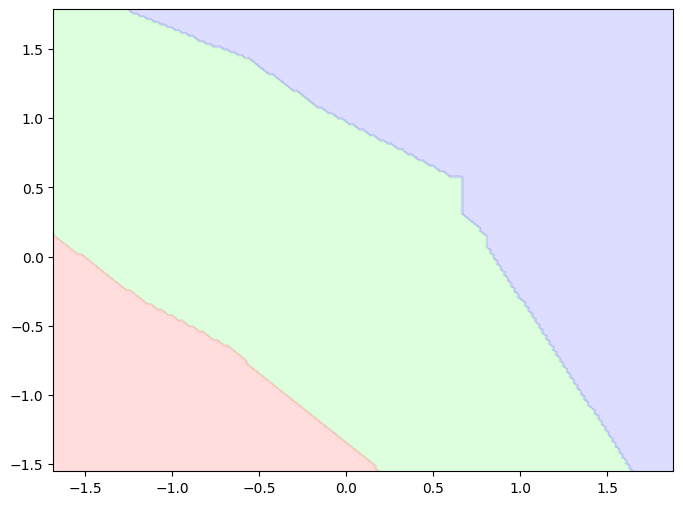

In [45]:
# Create meshgrid
h = .02
x_min, x_max = X_vis_scaled[:, 0].min() - 0.1, X_vis_scaled[:, 0].max() + 0.1
y_min, y_max = X_vis_scaled[:, 1].min() - 0.1, X_vis_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on meshgrid
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

# Define cmap_bold for plotting data points
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

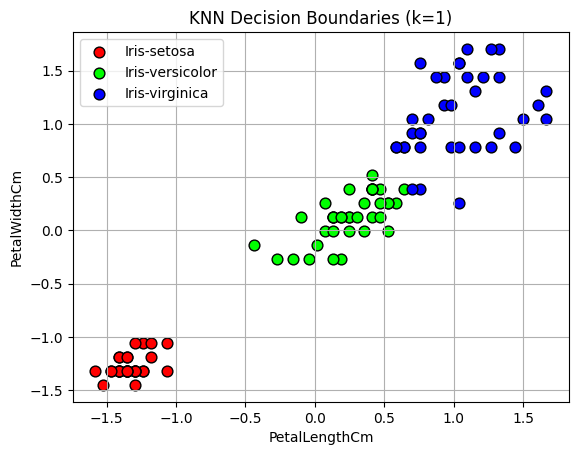

In [46]:
# Plot the training points
for i, label in enumerate(np.unique(y_train_vis_encoded)):
    plt.scatter(X_train_vis[y_train_vis_encoded == label, 0],
                X_train_vis[y_train_vis_encoded == label, 1],
                c=[cmap_bold(i)],
                label=label_encoder.inverse_transform([label])[0],
                edgecolor='k', s=60)

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(f'KNN Decision Boundaries (k={best_k})')
plt.legend()
plt.grid(True)
plt.show()